# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [6]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [5]:
%cd /content
!curl -L "https://public.roboflow.com/ds/A83GURjQrM?key=nR5Gdijp5E" > data.zip ; unzip data.zip ; rm data.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   907  100   907    0     0   1699      0 --:--:-- --:--:-- --:--:--  1698
100  108M  100  108M    0     0  86.3M      0  0:00:01  0:00:01 --:--:-- 86.3M
Archive:  data.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Abyssinian_127_jpg.rf.4425d22917ead085ad038931b4806c8f.jpg  
 extracting: test/Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81930b35a2.jpg  
 extracting: test/Abyssinian_149_jpg.rf.84b8351968b42b38478e0b6c35d58d07.jpg  
 extracting: test/Abyssinian_155_jpg.rf.b0d3e78a69efe3c9aa7bd4416a51e105.jpg  
 extracting: test/Abyssinian_15_jpg.rf.0e12ac0df99238e4f77a9eb02877b769.jpg  
 extracting: test/Abyssinian_167_jpg.rf.de4ef71b17d239eb8920914948d63627.jpg  
 extracting: test/Abyssinian_174_jpg.rf.65d50b9681532f2d3cf3773225103cbf.jpg  
 extracti

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [7]:
df = pd.read_csv('../content/train/_annotations.csv')
df = shuffle(df)
df.head()

filename  width  height class  \
2433  scottish_terrier_105_jpg.rf.f28bfb17acde62c122...    500     375   dog   
172   chihuahua_122_jpg.rf.1bac2de6cd0de10bdf2bb5f40...    300     225   dog   
1736  american_pit_bull_terrier_168_jpg.rf.ab613e902...    288     300   dog   
8     Bombay_159_jpg.rf.0a9aac65e642b5b511cfecb7e6c7...    184     250   cat   
1939  Birman_16_jpg.rf.bdda4900cc9d794cab575ce594658...    500     333   cat   

      xmin  ymin  xmax  ymax  
2433   108     0   285   181  
172     97    16   212   135  
1736   114    36   191   135  
8       14    42    82   106  
1939    64    15   293   220

<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">
    
 * This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.
 * classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [10]:
classes = df['class'].unique()
print(classes)

['dog' 'cat']


In [31]:
labels = { 'dog':'dog', 'cat':'cat'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [29]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '../content/train/'

for class_id in classes:
    first_row = df[df['class'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['filename'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

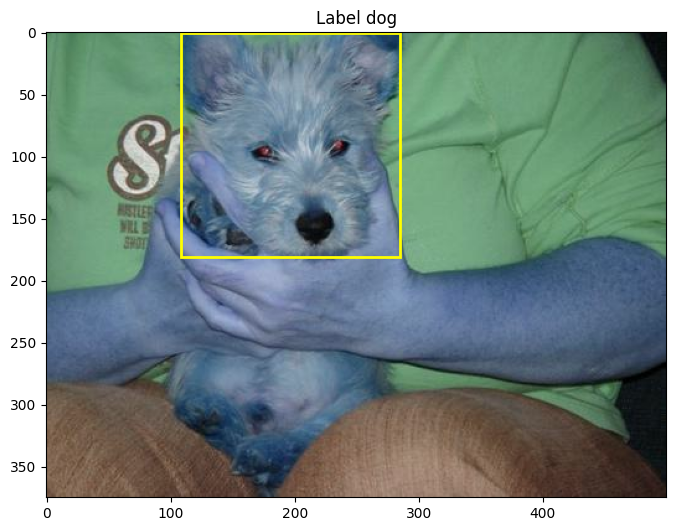

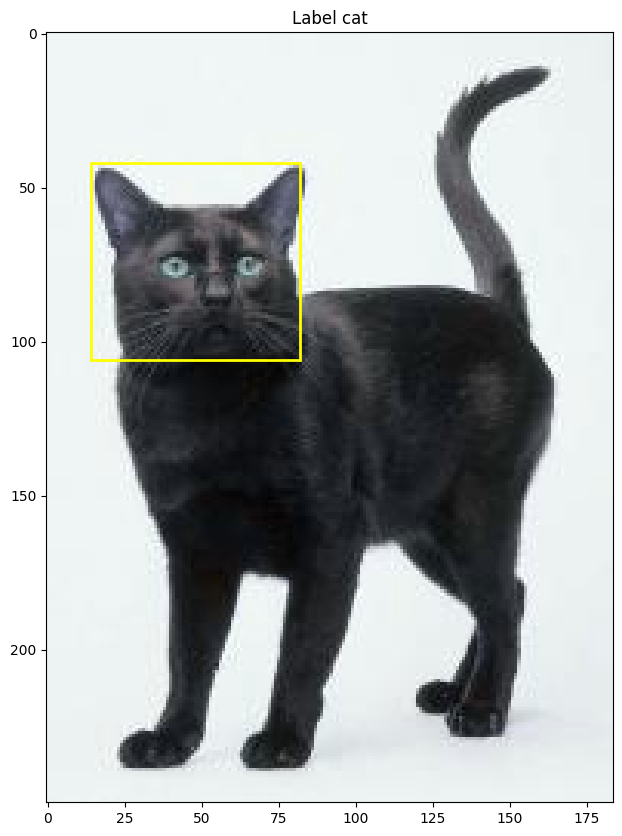

In [32]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [33]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [34]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [35]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 80.7MB/s]


In [43]:
results=model.predict(source="../content/test/english_cocker_spaniel_111_jpg.rf.c43dc02a20af87e008632f112f161760.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /content/../content/test/english_cocker_spaniel_111_jpg.rf.c43dc02a20af87e008632f112f161760.jpg: 512x640 1 dog, 1351.1ms
Speed: 3.8ms preprocess, 1351.1ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict


In [37]:
result = results[0]
box = result.boxes[0]

In [38]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [39]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 15.0
Coordinates: [56.41912841796875, 41.57924270629883, 558.2606201171875, 330.3132019042969]
Probability: 0.9220132231712341


In [40]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: cat
Coordinates: [56, 42, 558, 330]
Probability: 0.92
---


In [44]:
results1 = model.predict(source="../content/test/leonberger_112_jpg.rf.1b8069d211ac5343366984b9135e0d81.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /content/../content/test/leonberger_112_jpg.rf.1b8069d211ac5343366984b9135e0d81.jpg: 480x640 1 dog, 1183.2ms
Speed: 3.7ms preprocess, 1183.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


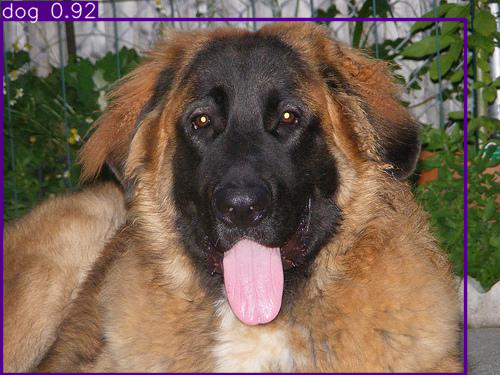

In [45]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 /content/../content/test/Birman_144_jpg.rf.b703797c5e9aefcd564f1e806af69ad4.jpg: 480x640 1 cat, 1240.3ms
Speed: 5.6ms preprocess, 1240.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


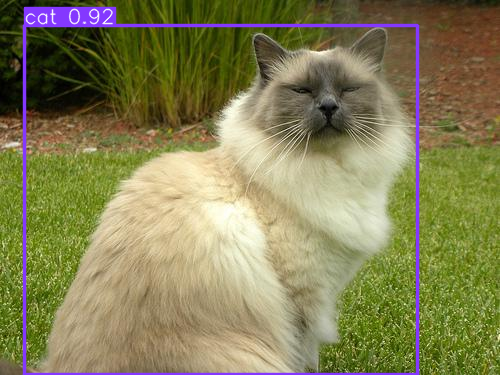


image 1/1 /content/../content/test/Russian_Blue_148_jpg.rf.33d30c286ff11ae33d2182454bcb7d06.jpg: 448x640 1 cat, 1 chair, 1126.9ms
Speed: 3.7ms preprocess, 1126.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


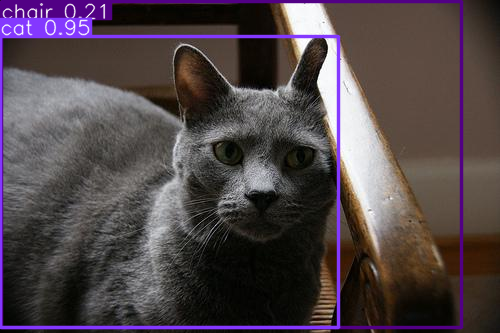


image 1/1 /content/../content/test/great_pyrenees_190_jpg.rf.ee427e9ac9a548e22809d76f2024f778.jpg: 480x640 1 dog, 1168.7ms
Speed: 3.8ms preprocess, 1168.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


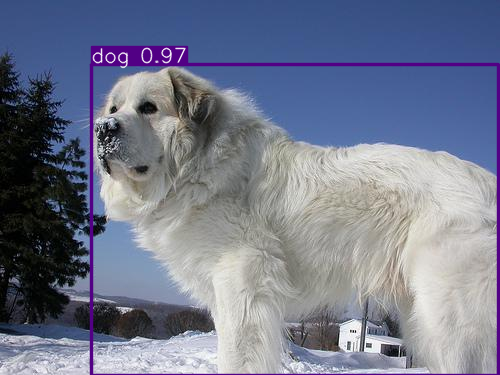


image 1/1 /content/../content/test/Siamese_148_jpg.rf.677e64c26bf2a26a9efe8d6f9b821493.jpg: 576x640 1 cat, 1 bowl, 1968.4ms
Speed: 5.7ms preprocess, 1968.4ms inference, 4.3ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict


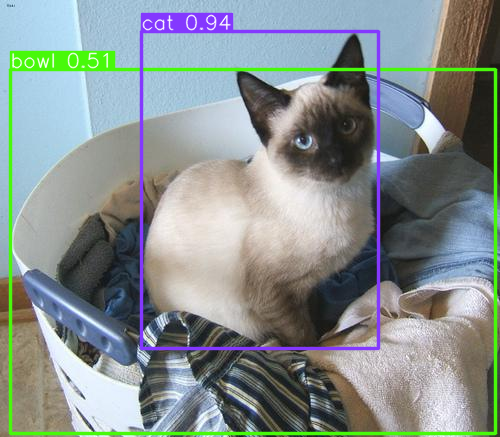


image 1/1 /content/../content/test/Sphynx_139_jpg.rf.9da1e5ac6fba5df0c8e8d36577115528.jpg: 576x640 1 zebra, 3174.4ms
Speed: 4.3ms preprocess, 3174.4ms inference, 31.2ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict


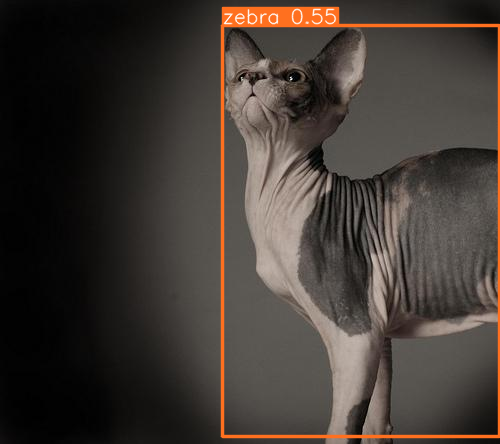


image 1/1 /content/../content/test/leonberger_174_jpg.rf.9d08eb76dd6193ac811dcf0a501b5cbf.jpg: 448x640 1 dog, 1109.7ms
Speed: 5.9ms preprocess, 1109.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


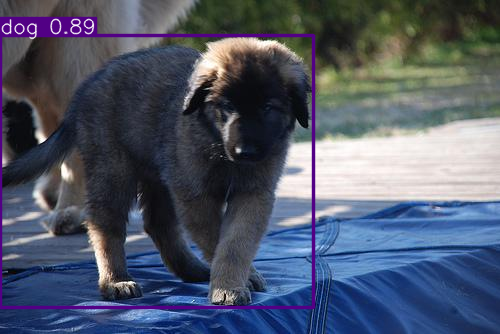


image 1/1 /content/../content/test/Abyssinian_155_jpg.rf.b0d3e78a69efe3c9aa7bd4416a51e105.jpg: 416x640 1 cat, 1020.5ms
Speed: 3.3ms preprocess, 1020.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


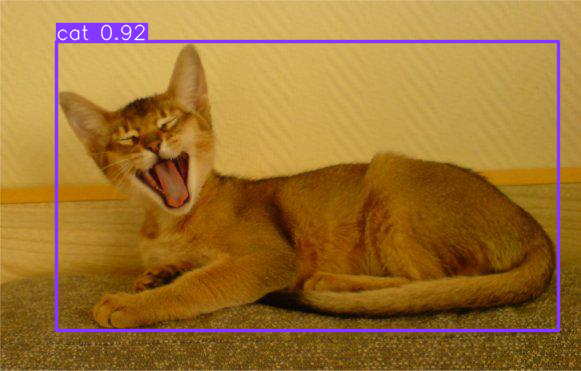


image 1/1 /content/../content/test/american_pit_bull_terrier_102_jpg.rf.b6f028034f768815d2bf9494f674ecc3.jpg: 640x608 1 person, 1 dog, 1544.5ms
Speed: 5.7ms preprocess, 1544.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict


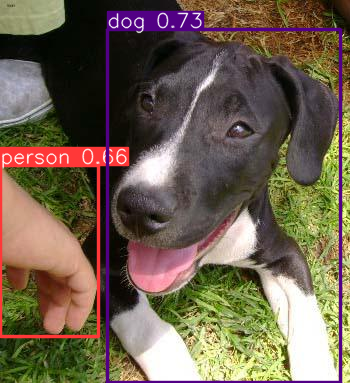


image 1/1 /content/../content/test/leonberger_173_jpg.rf.c656a19647ede0ad1a526e56ea7bb964.jpg: 448x640 1 bench, 1 dog, 1 sports ball, 1111.2ms
Speed: 6.2ms preprocess, 1111.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


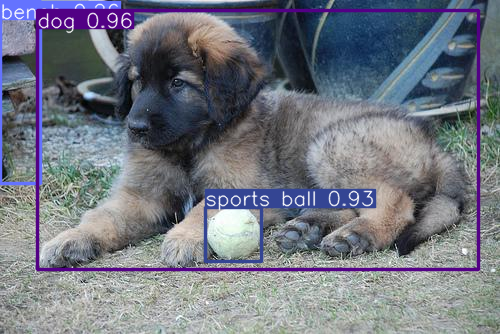


image 1/1 /content/../content/test/Bombay_122_jpg.rf.dfc13a76355e86b2513db39559a43277.jpg: 480x640 1 cat, 1 bed, 1186.3ms
Speed: 4.1ms preprocess, 1186.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


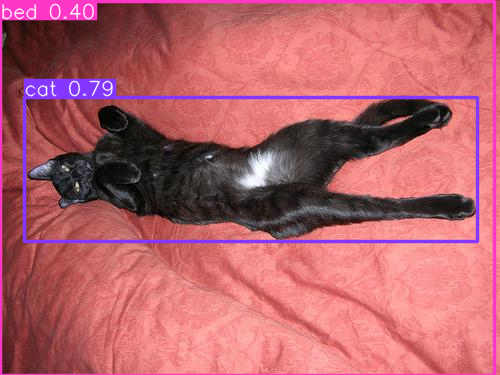


image 1/1 /content/../content/test/beagle_133_jpg.rf.b1f12f5e3c647542579801b0547acd78.jpg: 480x640 1 dog, 1 bed, 1193.7ms
Speed: 4.8ms preprocess, 1193.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


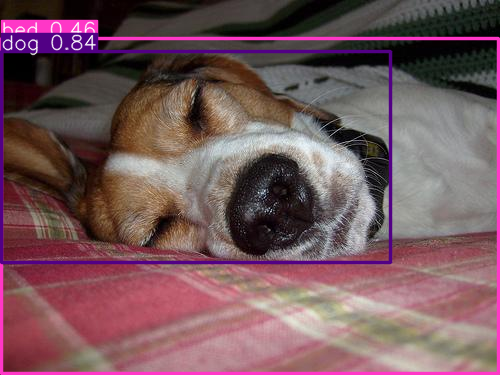


image 1/1 /content/../content/test/english_cocker_spaniel_142_jpg.rf.cd6214e0cfd27395fd527974bb082b4e.jpg: 544x640 1 dog, 2079.0ms
Speed: 4.9ms preprocess, 2079.0ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


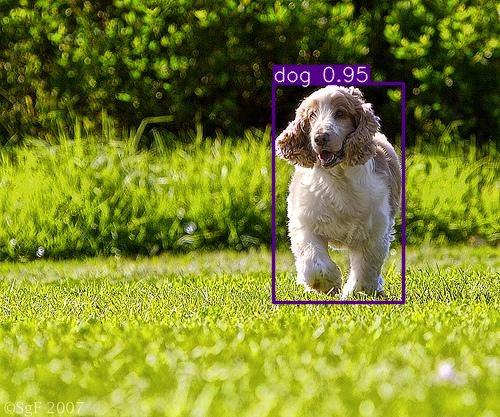


image 1/1 /content/../content/test/wheaten_terrier_126_jpg.rf.140dbcec0dd99ca9dbcf3ee159d43ad7.jpg: 448x640 1 person, 1 dog, 1 dining table, 1916.6ms
Speed: 5.5ms preprocess, 1916.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


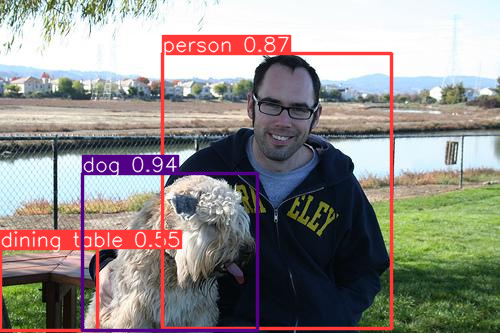


image 1/1 /content/../content/test/wheaten_terrier_120_jpg.rf.9700bf9baeb96d579a1fc6c65821dd46.jpg: 544x640 1 dog, 1 sports ball, 1 teddy bear, 1642.4ms
Speed: 9.1ms preprocess, 1642.4ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


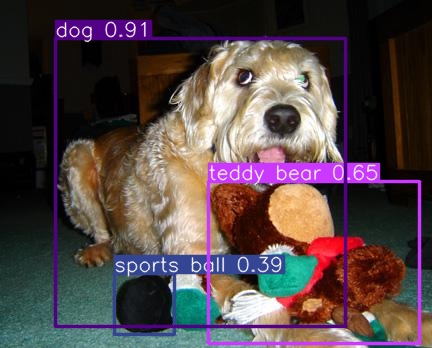


image 1/1 /content/../content/test/Bombay_117_jpg.rf.e4598ef743c177f7183d576d36e4fb90.jpg: 480x640 2 cats, 1 chair, 1 teddy bear, 1229.6ms
Speed: 6.5ms preprocess, 1229.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


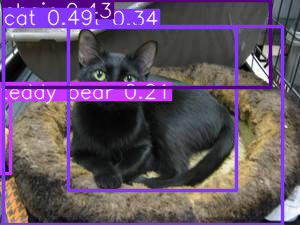


image 1/1 /content/../content/test/pug_185_jpg.rf.3f19836b96f5d9d63ee39bba2ec541e5.jpg: 480x640 1 dog, 1211.2ms
Speed: 3.6ms preprocess, 1211.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


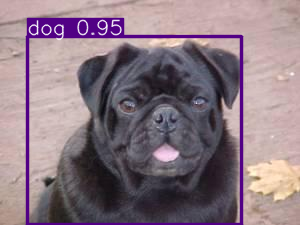


image 1/1 /content/../content/test/japanese_chin_162_jpg.rf.bf182ee732afda403c31ca8b95d14d39.jpg: 448x640 1 person, 1 dog, 1125.9ms
Speed: 3.5ms preprocess, 1125.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


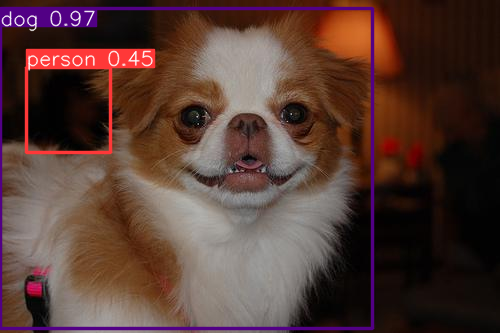


image 1/1 /content/../content/test/Russian_Blue_107_jpg.rf.dca9888074ec686dbd9c1c86ccb0e61c.jpg: 640x384 1 cat, 1013.5ms
Speed: 3.1ms preprocess, 1013.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


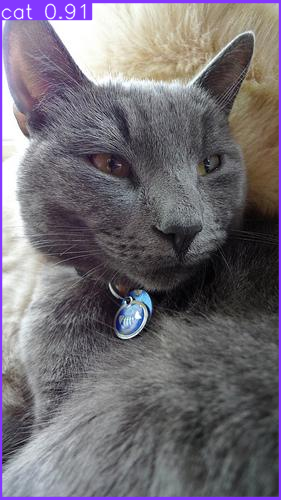


image 1/1 /content/../content/test/pug_108_jpg.rf.687dd58c7690e986065da9663b892d0d.jpg: 640x480 1 dog, 1 couch, 1261.3ms
Speed: 8.2ms preprocess, 1261.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


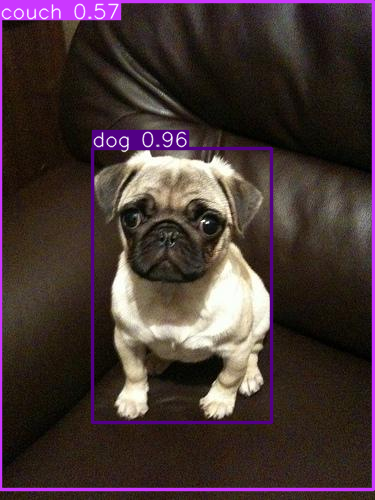


image 1/1 /content/../content/test/Bombay_127_jpg.rf.5f95e5202ada0f972330cd7ae272944d.jpg: 640x448 1 cat, 1 bed, 1191.1ms
Speed: 6.1ms preprocess, 1191.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


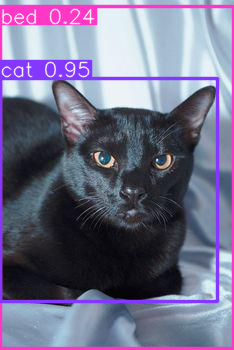


image 1/1 /content/../content/test/Siamese_152_jpg.rf.c1cd7008f88fcb04861256d080de488f.jpg: 640x448 1 cat, 1837.6ms
Speed: 5.7ms preprocess, 1837.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


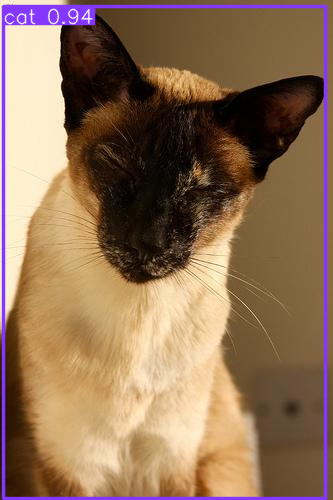


image 1/1 /content/../content/test/boxer_150_jpg.rf.00f70bfb2a19f0e4734bd9079171275e.jpg: 480x640 1 person, 1 dog, 1 horse, 2 chairs, 2070.3ms
Speed: 8.5ms preprocess, 2070.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


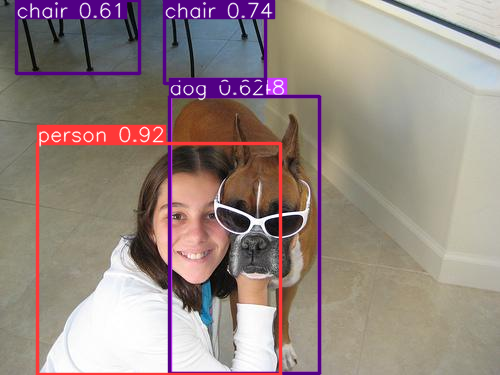


image 1/1 /content/../content/test/german_shorthaired_16_jpg.rf.e3449bd29d3d90ac58d72f784bbab468.jpg: 640x448 1 dog, 1465.1ms
Speed: 9.7ms preprocess, 1465.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


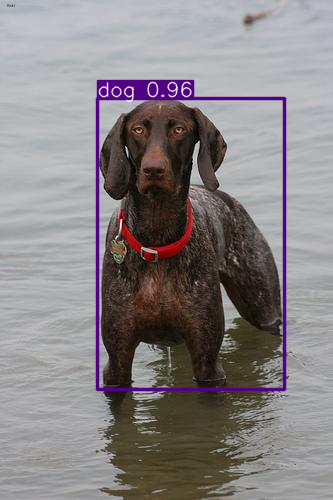


image 1/1 /content/../content/test/beagle_107_jpg.rf.8bdf8e1c890b0782212e9599f53a241f.jpg: 480x640 2 dogs, 1 couch, 1248.5ms
Speed: 6.1ms preprocess, 1248.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


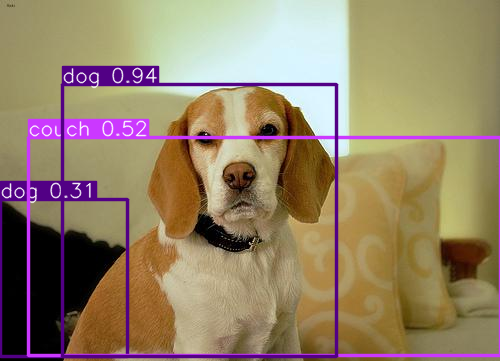

FileNotFoundError: No images or videos found in ../content/test/_annotations.csv. Supported formats are:
images: {'tif', 'png', 'jpeg', 'mpo', 'webp', 'pfm', 'dng', 'tiff', 'jpg', 'bmp'}
videos: {'wmv', 'mpeg', 'mov', 'mkv', 'mpg', 'avi', 'ts', 'mp4', 'asf', 'webm', 'gif', 'm4v'}

In [46]:
import os
from time import sleep

base_path = '../content/test/'
files = os.listdir(base_path)
for f in files:

  results1 = model.predict(source=base_path+f,
                save=True, conf=0.2,iou=0.5)

  Results = results1[0]
  plot = results1[0].plot()
  plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
  display(Image.fromarray(plot))
  sleep(.25)